# Milestone 1
- EDA, AutoEDA i pierwsze próby przetwarzania zmiennych - zaprezentowane zostały najciekawsze obserwacje i wykresy
- Uwaga: notebook stworzony w celach prezentacyjnych, kod częściowo pokrywa się z kodem z plików data_preparation.ipynb i EDA.ipynb

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [3]:
df = pd.read_csv("hotel_bookings.csv")
null_replacements = {"children:": 0, "country": "Unknown", "agent": 0, "company": 0}
hotels_df = df.fillna(null_replacements)
num_features = hotels_df.select_dtypes(include=['number']).columns.tolist()

In [4]:
hotels_df[num_features].corr()['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.293123
previous_cancellations            0.110133
adults                            0.060017
days_in_waiting_list              0.054186
adr                               0.047557
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
children                          0.005048
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
babies                           -0.032491
agent                            -0.046529
previous_bookings_not_canceled   -0.057358
company                          -0.082995
is_repeated_guest                -0.084793
booking_changes                  -0.144381
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

In [5]:
def helper(frame, col, axs = None, i = 0):
    frame2 = frame.groupby([col, 'is_canceled']).size().reset_index(name='counts')
    frame2['total'] = frame2.groupby(col)['counts'].transform('sum')
    frame2['proportion'] = frame2['counts'] / frame2['total']
    return sns.barplot(data = frame2.loc[frame2['is_canceled'] == True, :], x = col, y = 'proportion', hue = 'is_canceled', ax=axs[i], errorbar=None,
                order = pd.Series(frame['country']).value_counts().iloc[:15].index
                )

<Axes: xlabel='is_canceled', ylabel='lead_time'>

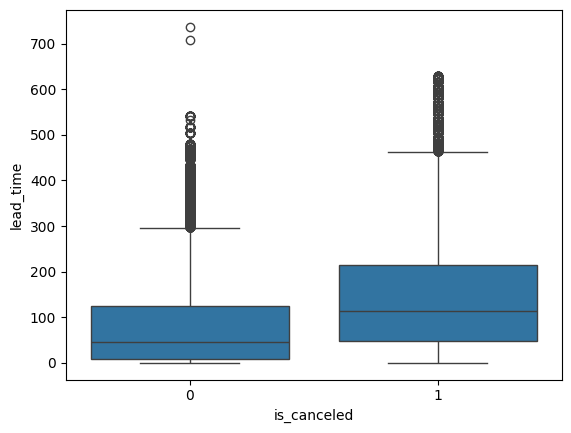

In [6]:
sns.boxplot(data = df, y = 'lead_time', x = 'is_canceled')

(0.0, 0.6)

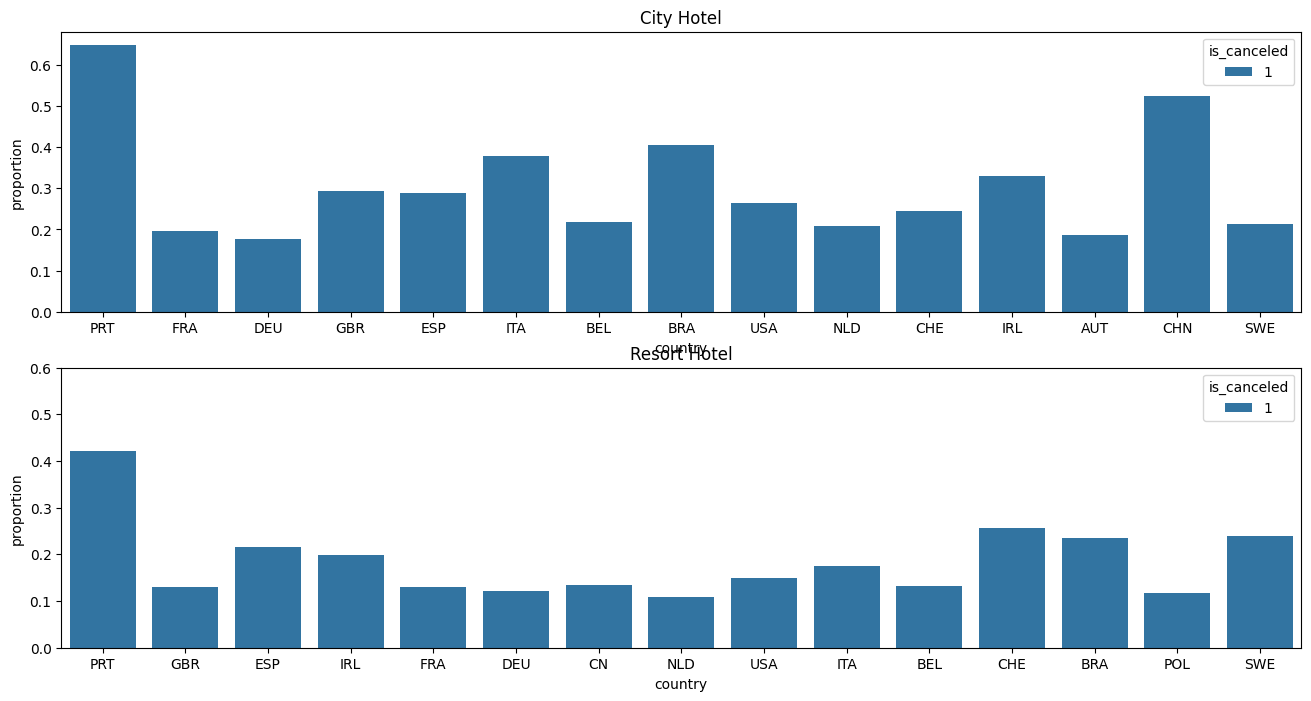

In [7]:
fig, axs = plt.subplots(2, 1, figsize = (16, 8), dpi = 100)
plot1 = helper(df[df['hotel'] == 'City Hotel'],'country', axs)
plot1.set_title('City Hotel')
plot2 = helper(df[df['hotel'] == 'Resort Hotel'],'country', axs, 1)
plot2.set_title('Resort Hotel')
plot2.set_ylim(0, 0.6)

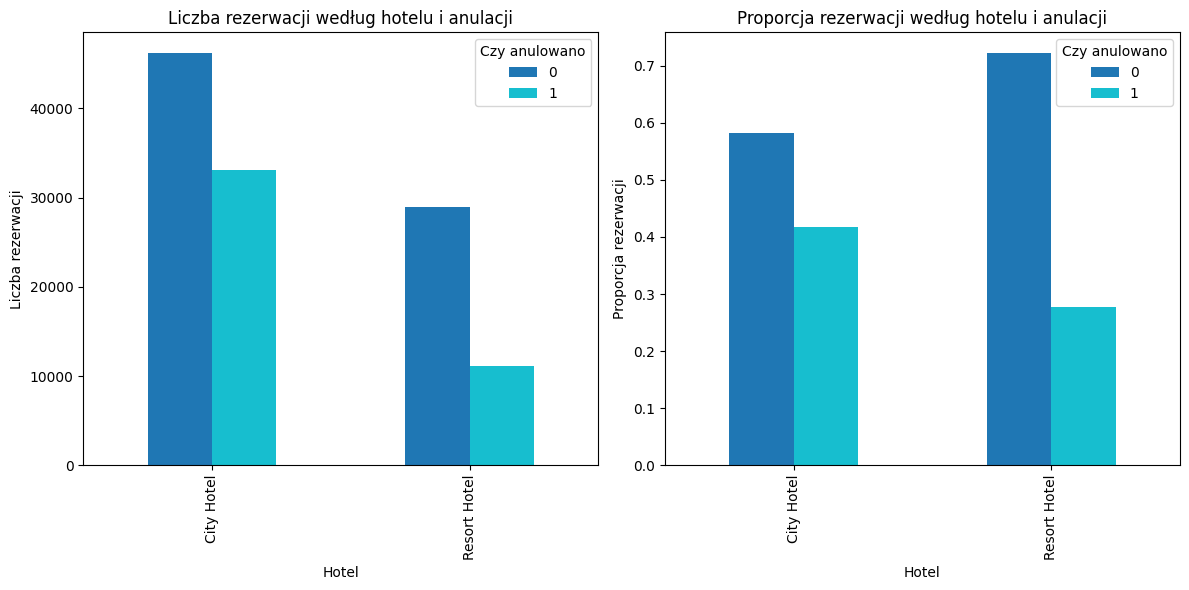

In [8]:
counts = hotels_df.groupby(["hotel", "is_canceled"]).size().unstack()

proportions = counts.div(counts.sum(axis=1), axis=0)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

counts.plot(kind="bar", stacked=False, ax=axes[0], colormap="tab10")
axes[0].set_xlabel("Hotel")
axes[0].set_ylabel("Liczba rezerwacji")
axes[0].set_title("Liczba rezerwacji według hotelu i anulacji")
axes[0].legend(title="Czy anulowano")

proportions.plot(kind="bar", stacked=False, ax=axes[1], colormap="tab10")
axes[1].set_xlabel("Hotel")
axes[1].set_ylabel("Proporcja rezerwacji")
axes[1].set_title("Proporcja rezerwacji według hotelu i anulacji")
axes[1].legend(title="Czy anulowano")

plt.tight_layout()
plt.show()


### Auto EDA

In [ ]:
profile = ProfileReport(df, title="autoEDA", explorative=True)
profile.to_file("autoeda.html")

## Podsumowanie
- *kluczowe*: lead_time, hotel, is_repeated_guest + country
- *istotne*: arrival_date_month, market_segment i distribution_channel, assigned_room_type, customer_type, total_of_special_requests, required_parking_spaces